# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# Exploratory Data Analysis

## Data Loading and Exploration

In [2]:
df=pd.read_csv('/kaggle/input/datasets-clustering/customer_segmentation_data.csv')
df.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [3]:
# Creating a copy of the original 'df_segmentation' dataframe to avoid modifying it directly.
df_seg=df.copy()

In [4]:
df_seg.shape

(3834, 4)

In [5]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


## Data Cleaning and Preprocessing

In [6]:
df_seg.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [7]:
df_seg['minutes_watched'].fillna(0, inplace=True)

In [8]:
# Fill missing values in 'minutes_watched' column with zero
print("Missing values before handling:", df_seg['minutes_watched'].isnull().sum())

Missing values before handling: 0


## Data Visualization and Correlation Analysis:

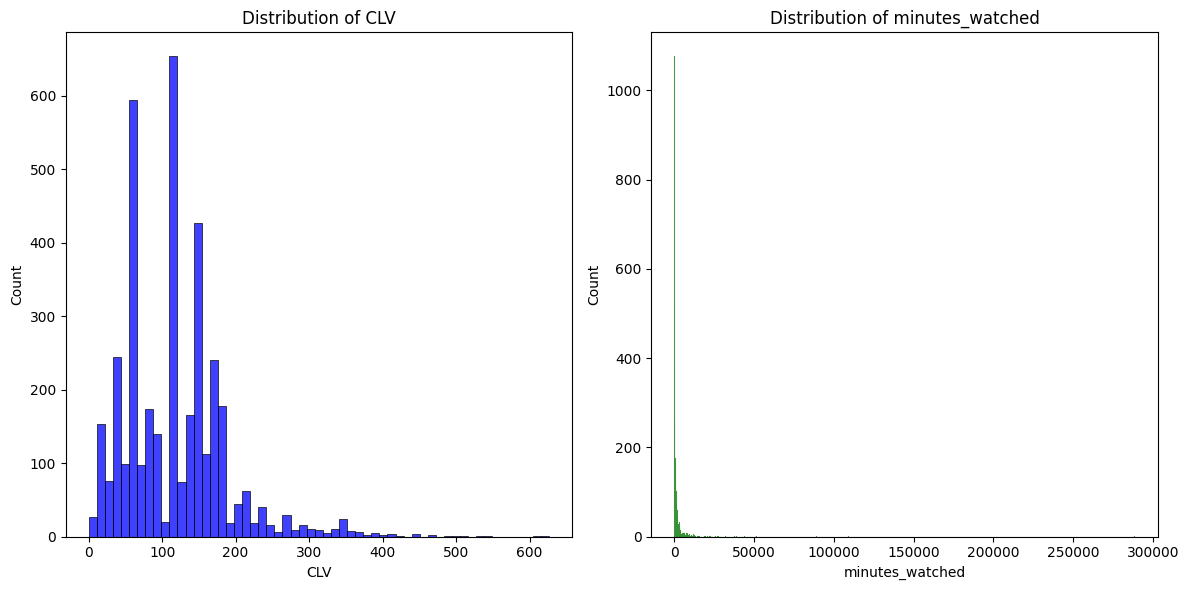

In [9]:
columns_to_plot = ['CLV', 'minutes_watched']
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_plot, 1):
      plt.subplot(1,len(columns_to_plot), i)
      sns.histplot(x=df_seg[column], color='blue' if column == 'CLV' else 'green')
      plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [10]:
df_seg.describe()

,minutes_watched,CLV,region,channel
count,3834.000000,3834.000000,3834.000000,3834.000000
mean,1916.028169,118.383920,1.167188,3.870370
std,7303.052488,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,137.000000,62.580000,0.000000,2.000000
50%,480.500000,119.000000,2.000000,3.000000
75%,1464.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


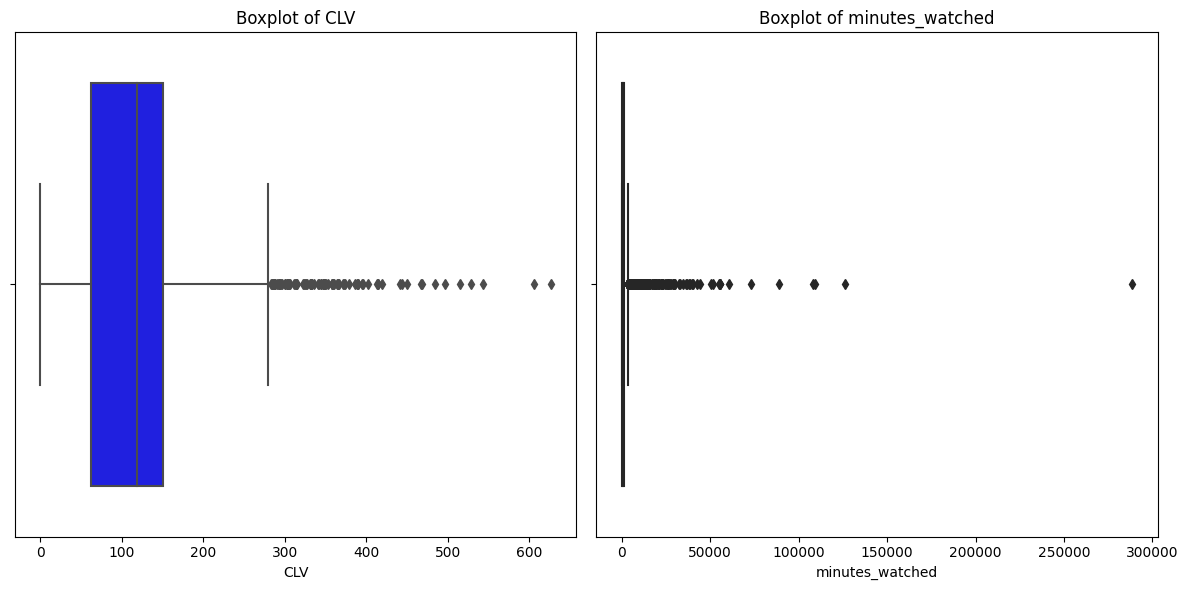

In [11]:
columns_to_plot = ['CLV', 'minutes_watched']
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(x=df_seg[column], color='blue' if column == 'CLV' else 'green')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [12]:
# Calculate the correlation matrix
correlation_matrix = df_seg.corr()

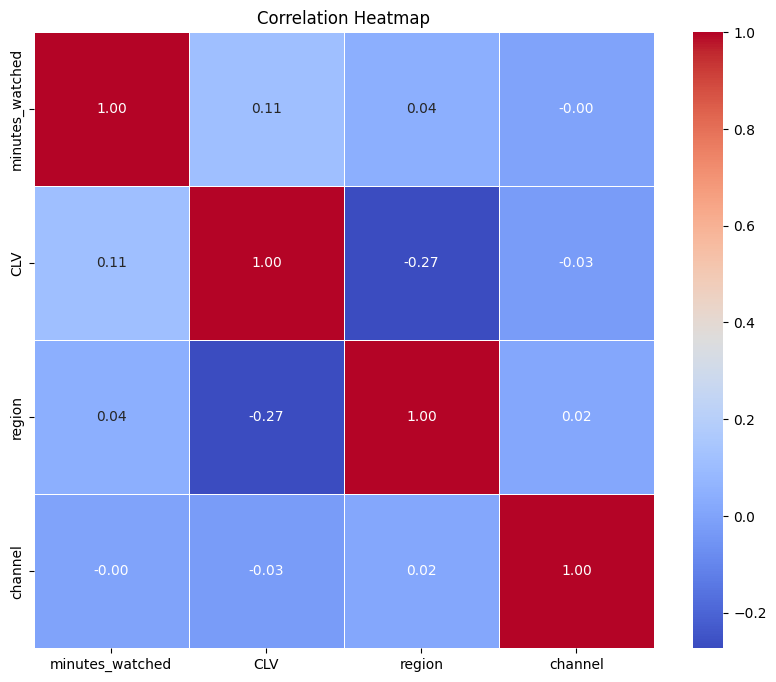

In [13]:
# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

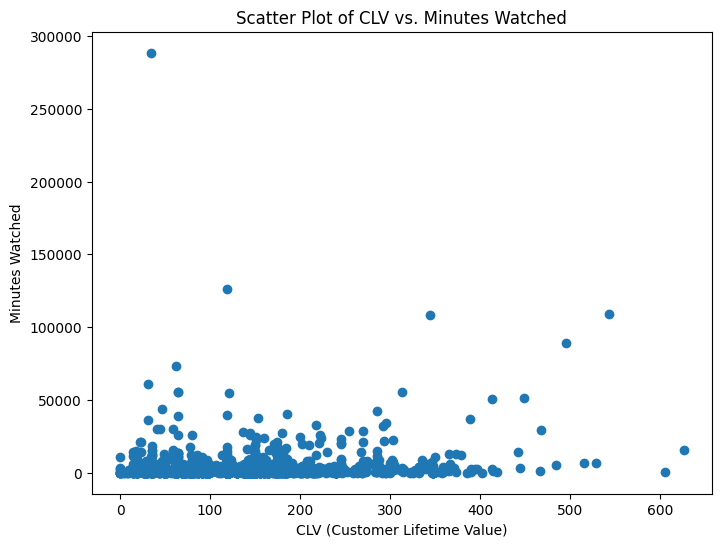

In [14]:
# Scatter plot for CLV and minutes_watched
plt.figure(figsize=(8, 6))
plt.scatter(df_seg.iloc[:,1],df_seg.iloc[:,0])
plt.title('Scatter Plot of CLV vs. Minutes Watched')
plt.xlabel('CLV (Customer Lifetime Value)')
plt.ylabel('Minutes Watched')
plt.show()

## Create Dummy Variables

In [15]:
df_heard_from = df_seg['channel']

In [16]:
df_country=df_seg['region']

In [17]:
df_dummies = pd.get_dummies(df['channel'].apply(pd.Series).stack())
df_dummies = df_dummies.groupby(level=0).sum()
df = df.join(df_dummies)

In [18]:
segment_dummies = pd.get_dummies(df_heard_from, prefix = 'channel', prefix_sep = '_')
df_seg = pd.concat([df_seg, segment_dummies], axis = 1)

In [19]:
segment_dummies_2 = pd.get_dummies(df_country, prefix = 'country_region', prefix_sep = '_')
df_seg = pd.concat([df_seg, segment_dummies_2], axis = 1)

In [20]:
# drop the channel variable as it is non-numerical and we'll not be able to perform the segmentation
df_seg = df_seg.drop(["channel"], axis = 1)

In [21]:
df_seg

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2
0,3197.0,205.42,2,False,False,False,True,False,False,False,False,False,False,True
1,63.0,149.99,0,True,False,False,False,False,False,False,False,True,False,False
2,605.0,119.00,2,False,True,False,False,False,False,False,False,False,False,True
3,20.0,240.00,2,False,False,False,True,False,False,False,False,False,False,True
4,245.0,184.36,1,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,False,False,True,False,False,False,False,False,True,False,False
3830,28.0,79.00,0,False,True,False,False,False,False,False,False,True,False,False
3831,57.0,36.00,2,False,True,False,False,False,False,False,False,False,False,True
3832,44.0,36.00,2,True,False,False,False,False,False,False,False,False,False,True


In [22]:
df_seg.columns

Index(['minutes_watched', 'CLV', 'region', 'channel_1', 'channel_2',
       'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7',
       'channel_8', 'country_region_0', 'country_region_1',
       'country_region_2'],
      dtype='object')

In [23]:
df_seg=df_seg.rename(columns={'channel_1':'Google','channel_2':'Facebook','channel_3':'YouTube','channel_4':'LinkedIn',
                              'channel_5':'Twitter','channel_6':'instgram', 'channel_7':'Friend','channel_8':'Other',
                              'country_region_0':'Region_0','country_region_1':'Region_1','country_region_2':'Region_2'})

In [24]:
df_seg.head()

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,instgram,Friend,Other,Region_0,Region_1,Region_2
0,3197.0,205.42,2,False,False,False,True,False,False,False,False,False,False,True
1,63.0,149.99,0,True,False,False,False,False,False,False,False,True,False,False
2,605.0,119.00,2,False,True,False,False,False,False,False,False,False,False,True
3,20.0,240.00,2,False,False,False,True,False,False,False,False,False,False,True
4,245.0,184.36,1,False,False,False,True,False,False,False,False,False,True,False


# Model Implementation

## Data standrizatin

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_seg_scaled = scaler.fit_transform(df_seg)

## Machine learning Models

### hierarchical clustering

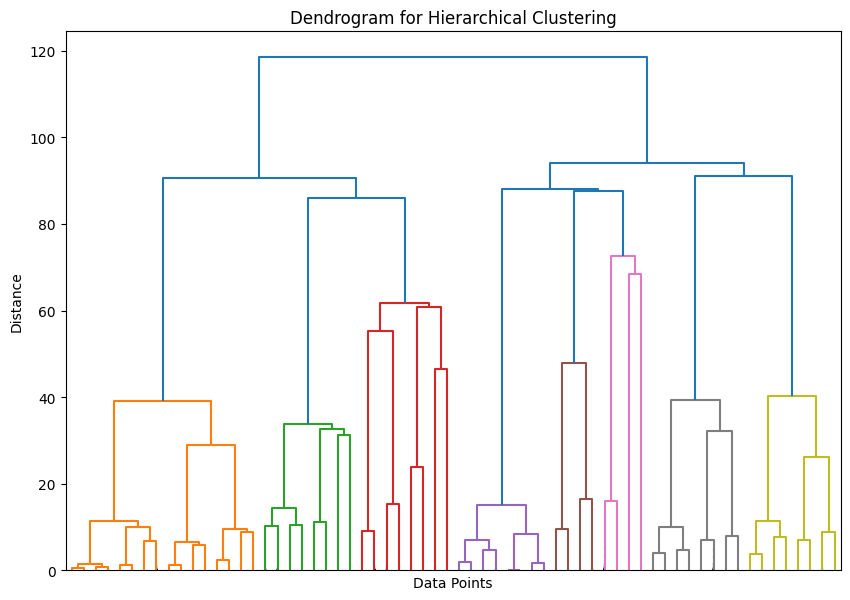

In [26]:
# Perform hierarchical clustering
heir_cluster= linkage(df_seg_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(heir_cluster,
           truncate_mode = 'level',
           p = 5,
           show_contracted = True,
           show_leaf_counts = False,
           no_labels=True
           )
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

###  K-means Clustering and Elbow **Method**

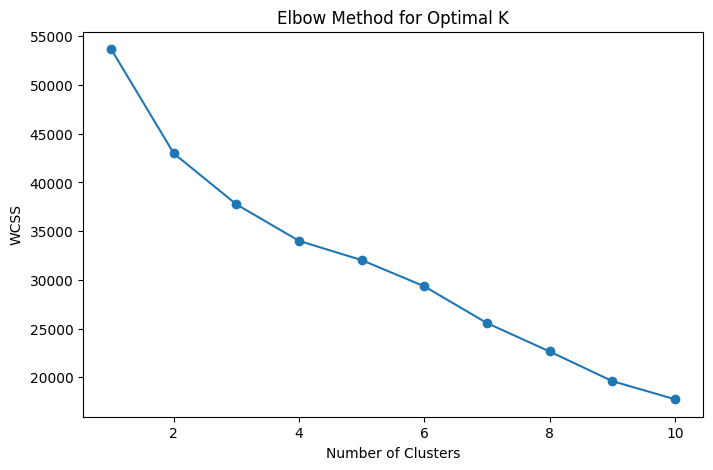

In [27]:
# Define a range for possible cluster numbers
wcss = []  # Within-cluster sum of squares
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_seg_scaled)
    wcss.append(kmeans.inertia_)  # Append inertia, which is the WCSS

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
kmeans.fit(df_seg_scaled)

KMeans(random_state=42)

# Model Interpretation and Results

In [29]:
# Creating a copy of the original 'df_segmentation' dataframe to avoid modifying it directly.
df_seg_kmeans = df_seg.copy()

In [30]:
# Assigning the cluster labels generated by k-means to a new column named 'Segment' in the copied dataframe.
df_seg_kmeans['Segment'] = kmeans.labels_

In [31]:
pd.set_option('display.max_columns', 20)

In [32]:
# Grouping the dataframe by the 'Segment' column and calculating the mean for each segment.
# This provides a profile for each cluster based on the mean values of the original features.
df_seg_analysis = df_seg_kmeans.groupby(['Segment']).mean()
# Displaying the segmented analysis (this line is more relevant in an interactive environment like Jupyter Notebook).
df_seg_analysis

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,instgram,Friend,Other,Region_0,Region_1,Region_2
Segment,,,,,,,,,,,,,,
0,1299.332180,115.180277,1.186851,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.311419,0.190311,0.498270
1,1801.265985,91.118312,2.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
2,2018.969340,109.117382,1.419811,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.290094,0.000000,0.709906
3,2326.887114,103.938839,2.000000,0.349308,0.0,0.544196,0.000000,0.0,0.0,0.000000,0.106496,0.000000,0.000000,1.000000
4,1539.152607,136.329469,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.000000,0.140284,1.000000,0.000000,0.000000
5,1874.747312,157.922581,1.000000,0.217742,0.0,0.341398,0.188172,0.0,0.0,0.145161,0.107527,0.000000,1.000000,0.000000
6,985.327586,93.151552,1.603448,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.172414,0.051724,0.775862
7,2767.643791,108.260359,1.323529,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.287582,0.101307,0.611111


In [33]:
df_seg_analysis['N Obs'] = df_seg_kmeans[['Segment','Region_0']].groupby(['Segment']).count()
df_seg_analysis['Prop Obs'] = df_seg_analysis['N Obs'] / df_seg_analysis['N Obs'].sum()

In [34]:
df_seg_analysis

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,instgram,Friend,Other,Region_0,Region_1,Region_2,N Obs,Prop Obs
Segment,,,,,,,,,,,,,,,,
0,1299.332180,115.180277,1.186851,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.311419,0.190311,0.498270,289,0.075378
1,1801.265985,91.118312,2.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,391,0.101982
2,2018.969340,109.117382,1.419811,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.290094,0.000000,0.709906,424,0.110589
3,2326.887114,103.938839,2.000000,0.349308,0.0,0.544196,0.000000,0.0,0.0,0.000000,0.106496,0.000000,0.000000,1.000000,939,0.244914
4,1539.152607,136.329469,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.000000,0.140284,1.000000,0.000000,0.000000,1055,0.275170
5,1874.747312,157.922581,1.000000,0.217742,0.0,0.341398,0.188172,0.0,0.0,0.145161,0.107527,0.000000,1.000000,0.000000,372,0.097027
6,985.327586,93.151552,1.603448,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.172414,0.051724,0.775862,58,0.015128
7,2767.643791,108.260359,1.323529,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.287582,0.101307,0.611111,306,0.079812


In [35]:
# Rounding the dataframe values to 2 decimal places for cleaner presentation.
df_seg_analysis.round(2)

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,instgram,Friend,Other,Region_0,Region_1,Region_2,N Obs,Prop Obs
Segment,,,,,,,,,,,,,,,,
0,1299.33,115.18,1.19,0.00,0.0,0.00,0.00,0.0,1.0,0.00,0.00,0.31,0.19,0.50,289,0.08
1,1801.27,91.12,2.00,0.00,0.0,0.00,1.00,0.0,0.0,0.00,0.00,0.00,0.00,1.00,391,0.10
2,2018.97,109.12,1.42,0.00,0.0,0.00,0.00,0.0,0.0,1.00,0.00,0.29,0.00,0.71,424,0.11
3,2326.89,103.94,2.00,0.35,0.0,0.54,0.00,0.0,0.0,0.00,0.11,0.00,0.00,1.00,939,0.24
4,1539.15,136.33,0.00,0.25,0.0,0.43,0.18,0.0,0.0,0.00,0.14,1.00,0.00,0.00,1055,0.28
5,1874.75,157.92,1.00,0.22,0.0,0.34,0.19,0.0,0.0,0.15,0.11,0.00,1.00,0.00,372,0.10
6,985.33,93.15,1.60,0.00,0.0,0.00,0.00,1.0,0.0,0.00,0.00,0.17,0.05,0.78,58,0.02
7,2767.64,108.26,1.32,0.00,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.29,0.10,0.61,306,0.08


In [36]:
# Renaming the index labels (which are segment numbers) with more descriptive names.
# This provides a more interpretable profile for each cluster.
df_seg_analysis.rename({0:'Instagram Explorers',
                         1:'LinkedIn Networkers',
                         2:'Friends\' Influence',
                         3:'Google-YouTube Mix',
                         4:'Anglo-Saxon Multi-Channel',
                         5:'European Multi-Channel',
                         6:'Twitter Devotees',
                         7:'Facebook Followers',
                        })

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,instgram,Friend,Other,Region_0,Region_1,Region_2,N Obs,Prop Obs
Segment,,,,,,,,,,,,,,,,
Instagram Explorers,1299.332180,115.180277,1.186851,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.311419,0.190311,0.498270,289,0.075378
LinkedIn Networkers,1801.265985,91.118312,2.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,391,0.101982
Friends' Influence,2018.969340,109.117382,1.419811,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.290094,0.000000,0.709906,424,0.110589
Google-YouTube Mix,2326.887114,103.938839,2.000000,0.349308,0.0,0.544196,0.000000,0.0,0.0,0.000000,0.106496,0.000000,0.000000,1.000000,939,0.244914
Anglo-Saxon Multi-Channel,1539.152607,136.329469,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.000000,0.140284,1.000000,0.000000,0.000000,1055,0.275170
European Multi-Channel,1874.747312,157.922581,1.000000,0.217742,0.0,0.341398,0.188172,0.0,0.0,0.145161,0.107527,0.000000,1.000000,0.000000,372,0.097027
Twitter Devotees,985.327586,93.151552,1.603448,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.172414,0.051724,0.775862,58,0.015128
Facebook Followers,2767.643791,108.260359,1.323529,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.287582,0.101307,0.611111,306,0.079812


In [37]:
# Mapping the cluster numbers (Segment) to more human-readable labels using a dictionary.
# This helps in interpreting the clusters in plots and other visualizations.
df_seg_kmeans['Labels'] = df_seg_kmeans['Segment'].map({0:'Instagram Explorers',
                         1:'LinkedIn Networkers',
                         2:'Friends\' Influence',
                         3:'Google-YouTube Mix',
                         4:'Anglo-Saxon Multi-Channel',
                         5:'European Multi-Channel',
                         6:'Twitter Devotees',
                         7:'Facebook Followers',
                        })

In [38]:
df_seg_kmeans

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,instgram,Friend,Other,Region_0,Region_1,Region_2,Segment,Labels
0,3197.0,205.42,2,False,False,False,True,False,False,False,False,False,False,True,1,LinkedIn Networkers
1,63.0,149.99,0,True,False,False,False,False,False,False,False,True,False,False,4,Anglo-Saxon Multi-Channel
2,605.0,119.00,2,False,True,False,False,False,False,False,False,False,False,True,7,Facebook Followers
3,20.0,240.00,2,False,False,False,True,False,False,False,False,False,False,True,1,LinkedIn Networkers
4,245.0,184.36,1,False,False,False,True,False,False,False,False,False,True,False,5,European Multi-Channel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,False,False,True,False,False,False,False,False,True,False,False,4,Anglo-Saxon Multi-Channel
3830,28.0,79.00,0,False,True,False,False,False,False,False,False,True,False,False,7,Facebook Followers
3831,57.0,36.00,2,False,True,False,False,False,False,False,False,False,False,True,7,Facebook Followers
3832,44.0,36.00,2,True,False,False,False,False,False,False,False,False,False,True,3,Google-YouTube Mix


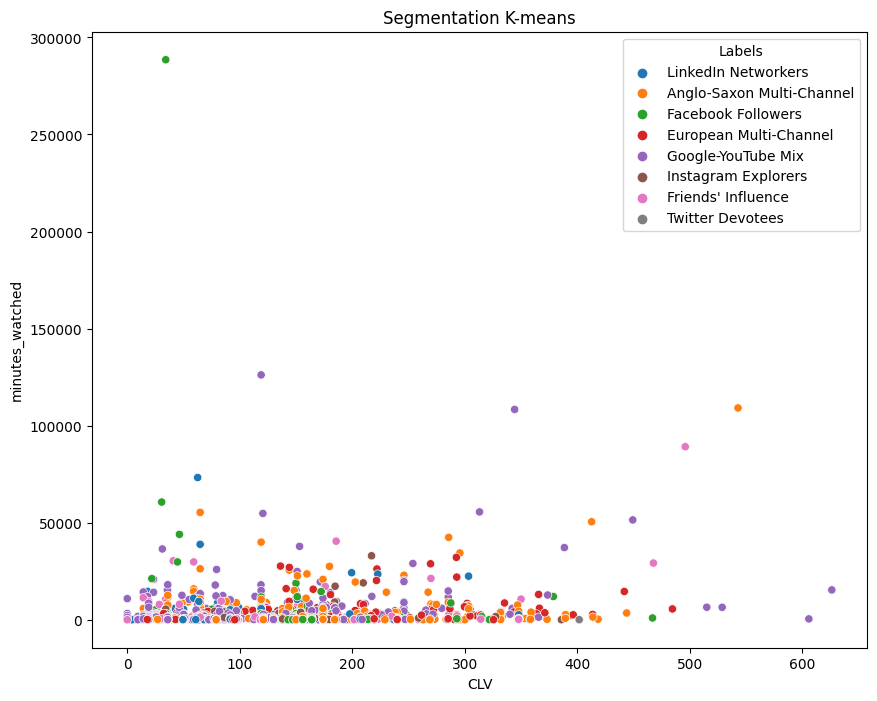

In [39]:
# Defining the x-axis data as 'total_payments' from the dataframe.
x_axis = df_seg_kmeans['CLV']

# Defining the y-axis data as 'minutes_watched' from the dataframe
y_axis = df_seg_kmeans['minutes_watched']

# Setting the figure size for the scatter plot.
plt.figure(figsize = (10, 8))

# Creating a scatter plot using seaborn.
# The 'hue' parameter colors the points based on the 'Labels' column, allowing for distinction between clusters.
sns.scatterplot(x = x_axis, y = y_axis, hue = df_seg_kmeans['Labels'])

# Setting the title of the scatter plot.
plt.title('Segmentation K-means')

# Displaying the scatter plot.
plt.show()